# Getting reach average shear stresses 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import topography data
P2_topo = pd.read_csv('../XS_topo/P2_topo.csv')
P3_topo = pd.read_csv('../XS_topo/P3_topo.csv')
P4_topo = pd.read_csv('../XS_topo/P4_topo.csv')
P6_topo = pd.read_csv('../XS_topo/P6_topo.csv')
# using ../ since we are going back a folder to get to the data

# import depth data and make date the index
depth_2021 = pd.read_csv('../water_depth/2021_depths.csv', index_col='Date_Time', parse_dates=True)
depth_2022 = pd.read_csv('../water_depth/2022_depths.csv', index_col='Date_Time', parse_dates=True)
depth_2023 = pd.read_csv('../water_depth/2023_depths.csv', index_col='Date_Time', parse_dates=True)

### Function definition - hydraulic radius

In [2]:
def get_hydraulic_radius(X, Y, WSE):
    wet_areas = []
    wet_perimeters = []
    poly_x = []
    poly_y = []

    # Loop through the points of the cross-section to find wet polygon
    for i in range(len(X) - 1):
        y1, y2 = Y[i], Y[i+1]
        x1, x2 = X[i], X[i+1]

        # First, checking if we enter the water
        if (y1 >= WSE and y2 < WSE):
            # Linear interpolation to find the intersection point
            x_int1 = x1 + (WSE - y1) * (x2 - x1) / (y2 - y1)
            poly_x.append(x_int1)
            poly_y.append(WSE)
        
        # If not, we check if the first point is below the WSE
        if (y1 < WSE):
            poly_x.append(x1)
            poly_y.append(y1)
        
        # Then, we check if we go out of the water. If we did, we calculate the area and store it
        if (y1 < WSE and y2 >= WSE):
            # Linear interpolation to find the intersection point
            x_int2 = x1 + (WSE - y1) * (x2 - x1) / (y2 - y1)
            poly_x.append(x_int2)
            poly_y.append(WSE)

            # Closing the polygon
            if len(poly_x) > 0:
                poly_x.append(poly_x[0])
                poly_y.append(poly_y[0])
            
            # Calculating the area
            tempCalc1 = 0.5 * np.abs(np.dot(poly_x, np.roll(poly_y, 1)) - np.dot(poly_y, np.roll(poly_x, 1)))
            wet_areas.append(tempCalc1)

            # Calculating the wet perimeter
            distances = np.sqrt(np.diff(poly_x)**2 + np.diff(poly_y)**2)
            wet_perimeters.append(np.sum(distances[:-1]))

            # Resetting the polygon
            poly_x = []
            poly_y = []
    
    # return hydraulic radius, wet area, wet perimeter
    tempCalc1 = np.sum(wet_areas)
    wet_area = tempCalc1
    tempCalc2 = np.sum(wet_perimeters)
    wet_perimeter = tempCalc2
    # check if tempCalc2 is zero to avoid division by zero
    if tempCalc2 == 0:
        hydraulic_radius = float('nan')  
    else:
        hydraulic_radius = tempCalc1 / tempCalc2
    
    return hydraulic_radius, wet_area, wet_perimeter

def calculate_hydraulic_radius(topography_df, depth_timeseries, depth_location):
    X = topography_df['distance'].values
    Z = topography_df['elevation'].values
    depth = depth_timeseries['depth'].values
    times = depth_timeseries.index 

    #find the riverbed elevation at the depth measurement location
    riverbed_elevation_at_depth_location = np.interp(depth_location, X, Z)

    hyd_rad = [] 
    wet_area = []
    wet_perimeter = []

    # loop over each time step and calculate hydraulic radius
    for d in depth:
        wse = riverbed_elevation_at_depth_location + d  # wse at this time step
        hydraulic_radius_calc, wet_area_calc, wet_perimeter_calc = get_hydraulic_radius(X, Z, wse)  # calculate hydraulic radius
        hyd_rad.append(hydraulic_radius_calc)
        wet_area.append(wet_area_calc)
        wet_perimeter.append(wet_perimeter_calc)

    # create a DataFrame with time and hydraulic radius for each time step
    R_timeseries = pd.DataFrame({
        'time': times,
        'hydraulic_radius': hyd_rad,
        'wet_area': wet_area,
        'wet_perimeter': wet_perimeter
    }).set_index('time')
    return R_timeseries, 

Prepping data to process through functions

In [3]:
# 2021 piezometers
P2_2021_depth = pd.DataFrame(depth_2021['P2']) 
P2_2021_depth.columns = ['depth'] # change the column name to 'depth'
P3_2021_depth = pd.DataFrame(depth_2021['P3'])
P3_2021_depth.columns = ['depth']
P4_2021_depth = pd.DataFrame(depth_2021['P4'])
P4_2021_depth.columns = ['depth']
P6_2021_depth = pd.DataFrame(depth_2021['P6'])
P6_2021_depth.columns = ['depth']

# 2022 piezometers
P2_2022_depth = pd.DataFrame(depth_2022['P2'])
P2_2022_depth.columns = ['depth']
P3_2022_depth = pd.DataFrame(depth_2022['P3'])
P3_2022_depth.columns = ['depth']
P4_2022_depth = pd.DataFrame(depth_2022['P4'])
P4_2022_depth.columns = ['depth']
P6_2022_depth = pd.DataFrame(depth_2022['P6'])
P6_2022_depth.columns = ['depth']

# 2023 piezometers
P2_2023_depth = pd.DataFrame(depth_2023['P2'])
P2_2023_depth.columns = ['depth']
P3_2023_depth = pd.DataFrame(depth_2023['P3'])
P3_2023_depth.columns = ['depth']
P4_2023_depth = pd.DataFrame(depth_2023['P4'])
P4_2023_depth.columns = ['depth']
P6_2023_depth = pd.DataFrame(depth_2023['P6'])
P6_2023_depth.columns = ['depth']

P2_2022_depth

,depth
Date_Time,
2022-03-01 00:00:00,0.120852
2022-03-01 00:15:00,0.119627
2022-03-01 00:30:00,0.118516
2022-03-01 00:45:00,0.117518
2022-03-01 01:00:00,0.116634
...,...
2022-09-16 23:00:00,0.116895
2022-09-16 23:15:00,0.118644
2022-09-16 23:30:00,0.115145


### Hydraulic radius and area by cross section

In [4]:
# 2021 hydraulic radius
P2_2021 = calculate_hydraulic_radius(P2_topo, P2_2021_depth, 0.7)
P3_2021 = calculate_hydraulic_radius(P3_topo, P3_2021_depth, 0.6)
P4_2021 = calculate_hydraulic_radius(P4_topo, P4_2021_depth, 2.5)
P6_2021 = calculate_hydraulic_radius(P6_topo, P6_2021_depth, 1.7)


# 2022 hydraulic radius
P2_2022 = calculate_hydraulic_radius(P2_topo, P2_2022_depth, 0.7)
P3_2022 = calculate_hydraulic_radius(P3_topo, P3_2022_depth, 0.6)
P4_2022 = calculate_hydraulic_radius(P4_topo, P4_2022_depth, 2.5)
P6_2022 = calculate_hydraulic_radius(P6_topo, P6_2022_depth, 1.7)

# 2023 hydraulic radius
P2_2023 = calculate_hydraulic_radius(P2_topo, P2_2023_depth, 0.7)
P3_2023 = calculate_hydraulic_radius(P3_topo, P3_2023_depth, 0.6)
P4_2023 = calculate_hydraulic_radius(P4_topo, P4_2023_depth, 2.5)
P6_2023 = calculate_hydraulic_radius(P6_topo, P6_2023_depth, 1.7)


In [5]:
P2_2021

(                     hydraulic_radius  wet_area  wet_perimeter
 time                                                          
 2021-07-01 00:00:00          0.053188  0.091253       1.715683
 2021-07-01 00:15:00          0.053188  0.091253       1.715683
 2021-07-01 00:30:00          0.053188  0.091253       1.715683
 2021-07-01 00:45:00          0.053192  0.091277       1.716003
 2021-07-01 01:00:00          0.053196  0.091302       1.716322
 ...                               ...       ...            ...
 2021-09-17 22:45:00          0.052358  0.083997       1.604267
 2021-09-17 23:00:00          0.052351  0.084031       1.605131
 2021-09-17 23:15:00          0.052356  0.084008       1.604555
 2021-09-17 23:30:00          0.052361  0.083985       1.603979
 2021-09-17 23:45:00          0.052356  0.084008       1.604555
 
 [7584 rows x 3 columns],)

In [6]:
# extract hydraulic radius column from each tuple and renaming it
hydraulic_radius_2021 = pd.DataFrame({
    'P2': P2_2021[0]['hydraulic_radius'],
    'P3': P3_2021[0]['hydraulic_radius'],
    'P4': P4_2021[0]['hydraulic_radius'],
    'P6': P6_2021[0]['hydraulic_radius']
})
hydraulic_radius_2022 = pd.DataFrame({
    'P2': P2_2022[0]['hydraulic_radius'],
    'P3': P3_2022[0]['hydraulic_radius'],
    'P4': P4_2022[0]['hydraulic_radius'],
    'P6': P6_2022[0]['hydraulic_radius']
})
hydraulic_radius_2023 = pd.DataFrame({
    'P2': P2_2023[0]['hydraulic_radius'],
    'P3': P3_2023[0]['hydraulic_radius'],
    'P4': P4_2023[0]['hydraulic_radius'],
    'P6': P6_2023[0]['hydraulic_radius']
})

# extract wet area column from each tuple and renaming it
wet_area_2021 = pd.DataFrame({
    'P2': P2_2021[0]['wet_area'],
    'P3': P3_2021[0]['wet_area'],
    'P4': P4_2021[0]['wet_area'],
    'P6': P6_2021[0]['wet_area']
})
wet_area_2022 = pd.DataFrame({
    'P2': P2_2022[0]['wet_area'],
    'P3': P3_2022[0]['wet_area'],
    'P4': P4_2022[0]['wet_area'],
    'P6': P6_2022[0]['wet_area']
})
wet_area_2023 = pd.DataFrame({
    'P2': P2_2023[0]['wet_area'],
    'P3': P3_2023[0]['wet_area'],
    'P4': P4_2023[0]['wet_area'],
    'P6': P6_2023[0]['wet_area']
})
wet_area_2023

,P2,P3,P4,P6
time,,,,
2023-03-01 00:00:00,0.168611,0.151567,0.117108,0.072868
2023-03-01 00:15:00,0.172527,0.157268,0.118891,0.074193
2023-03-01 00:30:00,0.176475,0.163057,0.123894,0.075437
2023-03-01 00:45:00,0.176475,0.163057,0.120119,0.076598
2023-03-01 01:00:00,0.172550,0.157301,0.120119,0.077677
...,...,...,...,...
2023-09-17 22:45:00,0.119906,0.087253,0.119864,0.052809
2023-09-17 23:00:00,0.116630,0.083549,0.117136,0.051001
2023-09-17 23:15:00,0.116630,0.083549,0.117136,0.051001


### Reach average velocity

Getting Discharge from P3 depth

In [7]:
def calculate_discharge(depth):
    if depth > 0.32377:
        return 9.64
    else:
        return 0.000000003 * (depth*100)**6.4168

depth_2021['Q'] = depth_2021['P3'].apply(calculate_discharge)
depth_2022['Q'] = depth_2022['P3'].apply(calculate_discharge)
depth_2023['Q'] = depth_2023['P3'].apply(calculate_discharge)

# discharge dataframes - discharge is in cfs, need to convert to m3/s
discharge_2021 = depth_2021[['Q']]*0.028316847
discharge_2022 = depth_2022[['Q']]*0.028316847
discharge_2023 = depth_2023[['Q']]*0.028316847
discharge_2023

,Q
Date_Time,
2023-03-01 00:00:00,0.019791
2023-03-01 00:15:00,0.021687
2023-03-01 00:30:00,0.023739
2023-03-01 00:45:00,0.023739
2023-03-01 01:00:00,0.021698
...,...
2023-09-17 22:45:00,0.004810
2023-09-17 23:00:00,0.004248
2023-09-17 23:15:00,0.004248


Calculate velocity in each cross section (U = Q / A)

In [8]:
velocity_2021 = pd.merge(wet_area_2021, discharge_2021, left_index=True, right_index=True, how='inner')
velocity_2022 = pd.merge(wet_area_2022, discharge_2022, left_index=True, right_index=True, how='inner')
velocity_2023 = pd.merge(wet_area_2023, discharge_2023, left_index=True, right_index=True, how='inner')

# calculate velocity (Q/A) for each piezometer - velocity is in m/s
# 2021
velocity_2021['P2_U'] = velocity_2021['Q'] / velocity_2021['P2']
velocity_2021['P3_U'] = velocity_2021['Q'] / velocity_2021['P3']
velocity_2021['P4_U'] = velocity_2021['Q'] / velocity_2021['P4']
velocity_2021['P6_U'] = velocity_2021['Q'] / velocity_2021['P6']
# 2022
velocity_2022['P2_U'] = velocity_2022['Q'] / velocity_2022['P2']
velocity_2022['P3_U'] = velocity_2022['Q'] / velocity_2022['P3']
velocity_2022['P4_U'] = velocity_2022['Q'] / velocity_2022['P4']
velocity_2022['P6_U'] = velocity_2022['Q'] / velocity_2022['P6']
# 2023
velocity_2023['P2_U'] = velocity_2023['Q'] / velocity_2023['P2']
velocity_2023['P3_U'] = velocity_2023['Q'] / velocity_2023['P3']
velocity_2023['P4_U'] = velocity_2023['Q'] / velocity_2023['P4']
velocity_2023['P6_U'] = velocity_2023['Q'] / velocity_2023['P6']

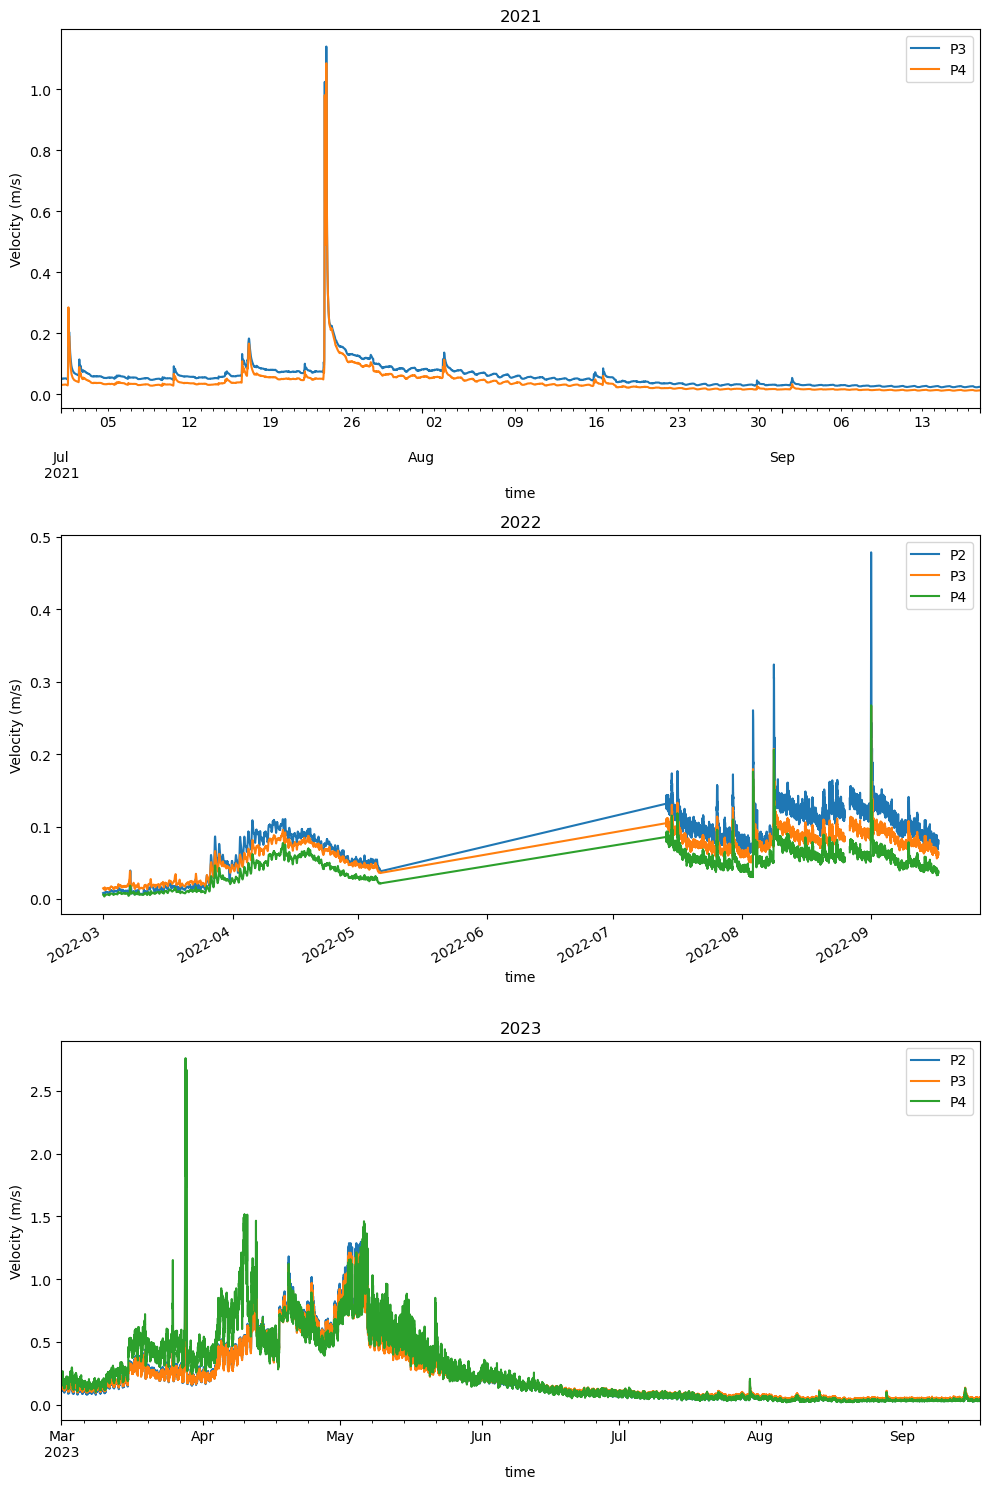

In [9]:
# plot of velocities for each piezometer in one fig
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
#velocity_2021['P2_U'].plot(ax=ax[0], label='P2')
velocity_2021['P3_U'].plot(ax=ax[0], label='P3')
velocity_2021['P4_U'].plot(ax=ax[0], label='P4')
#velocity_2021['P6_U'].plot(ax=ax[0], label='P6')
ax[0].set_title('2021')
ax[0].set_ylabel('Velocity (m/s)')
ax[0].legend()
velocity_2022['P2_U'].plot(ax=ax[1], label='P2')
velocity_2022['P3_U'].plot(ax=ax[1], label='P3')
velocity_2022['P4_U'].plot(ax=ax[1], label='P4')
#velocity_2022['P6_U'].plot(ax=ax[1], label='P6')
ax[1].set_title('2022')
ax[1].set_ylabel('Velocity (m/s)')
ax[1].legend()
velocity_2023['P2_U'].plot(ax=ax[2], label='P2')
velocity_2023['P3_U'].plot(ax=ax[2], label='P3')
velocity_2023['P4_U'].plot(ax=ax[2], label='P4')
#velocity_2023['P6_U'].plot(ax=ax[2], label='P6')
ax[2].set_title('2023')
ax[2].set_ylabel('Velocity (m/s)')
ax[2].legend()
plt.tight_layout()
plt.show()

Reach average velocity - unsing the discharge record (U = Q/A)

In [10]:
average_velocity_2021 = velocity_2021[['P3_U', 'P4_U']].mean(axis=1)
average_velocity_2022 = velocity_2022[['P2_U', 'P3_U', 'P4_U']].mean(axis=1)
average_velocity_2023 = velocity_2023[['P2_U', 'P3_U', 'P4_U']].mean(axis=1)
average_velocity_2021

time
2021-07-01 00:00:00    0.041000
2021-07-01 00:15:00    0.041000
2021-07-01 00:30:00    0.041000
2021-07-01 00:45:00    0.041095
2021-07-01 01:00:00    0.041191
                         ...   
2021-09-17 22:45:00    0.018585
2021-09-17 23:00:00    0.018664
2021-09-17 23:15:00    0.018611
2021-09-17 23:30:00    0.018559
2021-09-17 23:45:00    0.018611
Length: 7584, dtype: float64

Reach average velocity - using the velocity rating curve

In [11]:
def calculate_velocity(depth):
    if depth > 0.33: # depth is in meters 
        return 0.75 # velocity in m/s
    else:
        return 0.0372 * (depth*100) - 0.5341 

depth_2021['U'] = depth_2021['P3'].apply(calculate_velocity)
depth_2022['U'] = depth_2022['P3'].apply(calculate_velocity)
depth_2023['U'] = depth_2023['P3'].apply(calculate_velocity)

# discharge dataframes - discharge is in cfs, need to convert to m3/s
velocity_2021 = depth_2021[['U']]
velocity_2022 = depth_2022[['U']]
velocity_2023 = depth_2023[['U']]
velocity_2023['U']

Date_Time
2023-03-01 00:00:00    0.214949
2023-03-01 00:15:00    0.225707
2023-03-01 00:30:00    0.236487
2023-03-01 00:45:00    0.236487
2023-03-01 01:00:00    0.225768
                         ...   
2023-09-17 22:45:00    0.066757
2023-09-17 23:00:00    0.055244
2023-09-17 23:15:00    0.055244
2023-09-17 23:30:00    0.078208
2023-09-17 23:45:00    0.066757
Name: U, Length: 19296, dtype: float64

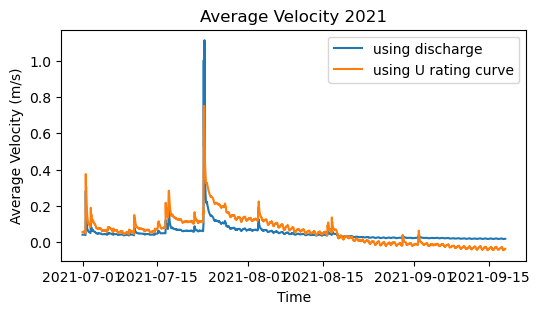

In [12]:
# Ensure both series have datetime indices
average_velocity_2021.index = pd.to_datetime(average_velocity_2021.index)
velocity_2021.index = pd.to_datetime(velocity_2021.index)
# plot of average velocity in time
plt.figure(figsize=(6, 3))
plt.plot(average_velocity_2021, label='using discharge')
plt.plot(velocity_2021['U'], label='using U rating curve')
#plt.plot(velocity_2021, label='using U rating curve')
plt.xlabel('Time')
plt.ylabel('Average Velocity (m/s)')
plt.title('Average Velocity 2021')
plt.legend()
plt.show()

Reach average hydraulic radius 

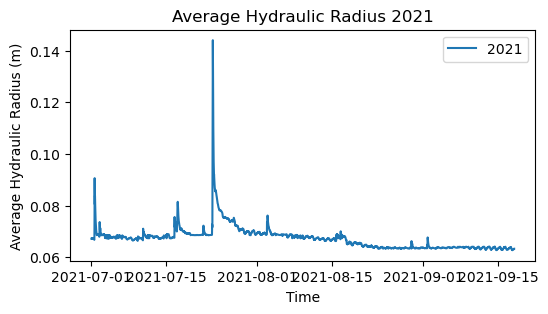

In [13]:
# get average of each piezometer for each time step
average_hydraulic_radius_2021 = hydraulic_radius_2021.mean(axis=1)
average_hydraulic_radius_2022 = hydraulic_radius_2022.mean(axis=1)
average_hydraulic_radius_2023 = hydraulic_radius_2023.mean(axis=1)
# plot of average hydraulic radius in time
plt.figure(figsize=(6, 3))
plt.plot(average_hydraulic_radius_2021, label='2021')
plt.xlabel('Time')
plt.ylabel('Average Hydraulic Radius (m)')
plt.title('Average Hydraulic Radius 2021')
plt.legend()
plt.show()

### Total shear stress as:

$\tau = g \rho s R$

In [14]:
# assigning the other variables
rho = 1000  # density of water in kg/m^3
g = 9.81  # acceleration due to gravity in m/s^2
s = 0.0945 # reach slope in m/m
# calculate shear stress for each time step
shear_stress_2021 = rho * g * s * average_hydraulic_radius_2021
shear_stress_2022 = rho * g * s * average_hydraulic_radius_2022
shear_stress_2023 = rho * g * s * average_hydraulic_radius_2023

### Partitioned shear stress (mobile) as: 

$\tau_m = \frac{\rho  C_m  U^2}{2}$

We will be assuming $C_m$ as 0.44 as per [Yager 2012](https://doi.org/10.1029/2011WR010829)

In [15]:
mobile_shear_stress_2021 = (rho * 0.44 * velocity_2021**2) / 2
mobile_shear_stress_2022 = (rho * 0.44 * velocity_2022**2) / 2
mobile_shear_stress_2023 = (rho * 0.44 * velocity_2023**2) / 2
# change the column name to 'shear_stress'
mobile_shear_stress_2021.columns = ['shear_stress']
mobile_shear_stress_2022.columns = ['shear_stress']
mobile_shear_stress_2023.columns = ['shear_stress']
mobile_shear_stress_2023


,shear_stress
Date_Time,
2023-03-01 00:00:00,10.164650
2023-03-01 00:15:00,11.207556
2023-03-01 00:30:00,12.303773
2023-03-01 00:45:00,12.303773
2023-03-01 01:00:00,11.213652
...,...
2023-09-17 22:45:00,0.980418
2023-09-17 23:00:00,0.671406
2023-09-17 23:15:00,0.671406


### Plot the shear stress record for each year

2021

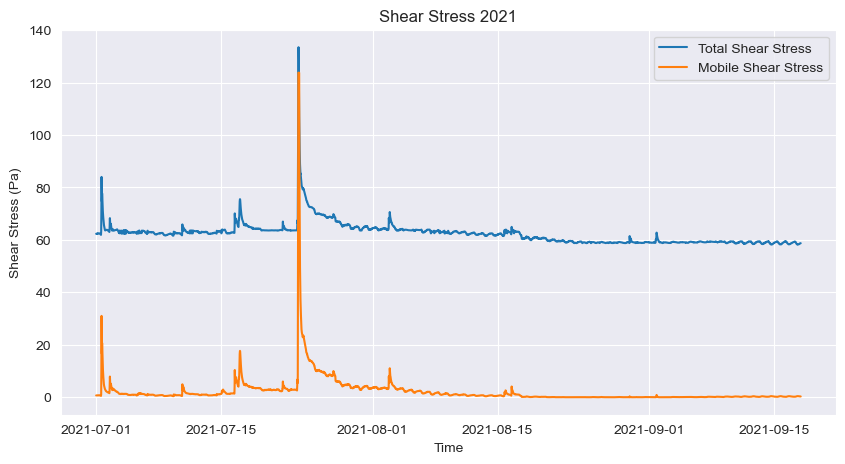

In [16]:
# 2021
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(shear_stress_2021)
plt.plot(mobile_shear_stress_2021)
plt.title('Shear Stress 2021')
plt.xlabel('Time')
plt.ylabel('Shear Stress (Pa)')
plt.legend(['Total Shear Stress', 'Mobile Shear Stress'])
plt.show()

2022

Text(0, 0.5, 'Shear Stress (Pa)')

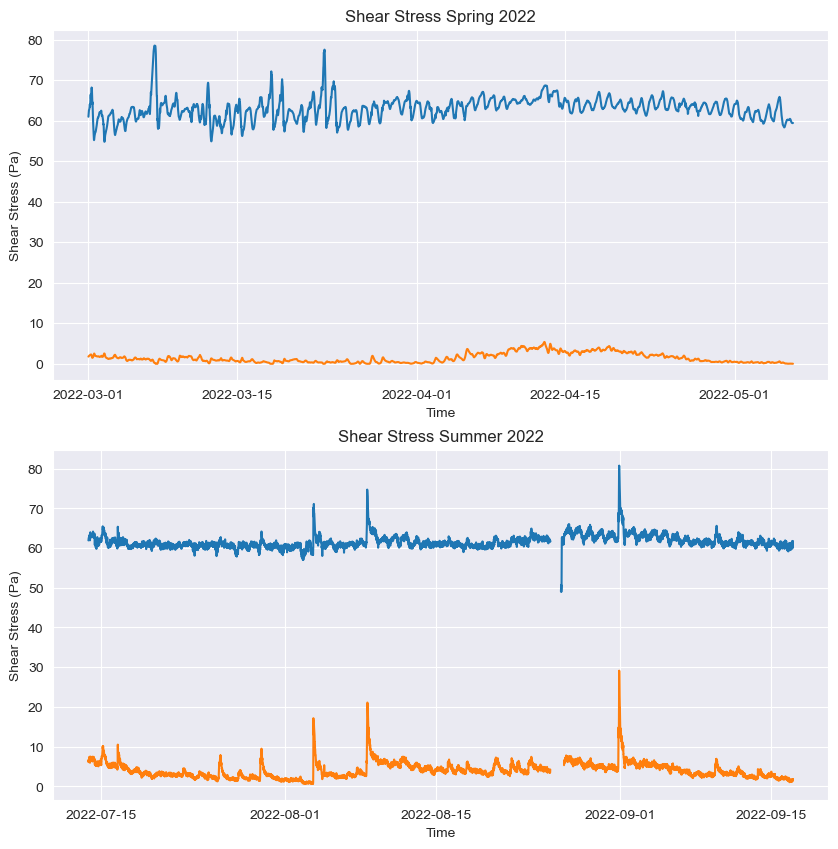

In [17]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=False)

# spring 2022
sns.set_style('darkgrid')
spring_total = shear_stress_2022['2022-03-01':'2022-06-01']
spring_mobile = mobile_shear_stress_2022['2022-03-01':'2022-06-01']
ax[0].plot(spring_total) 
ax[0].plot(spring_mobile)
ax[0].set_title('Shear Stress Spring 2022')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Shear Stress (Pa)')

# summer 2022
summer_total = shear_stress_2022['2022-06-01':'2022-09-18']
summer_mobile = mobile_shear_stress_2022['2022-06-01':'2022-09-18']
ax[1].plot(summer_total)
ax[1].plot(summer_mobile)
ax[1].set_title('Shear Stress Summer 2022')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Shear Stress (Pa)')


2023

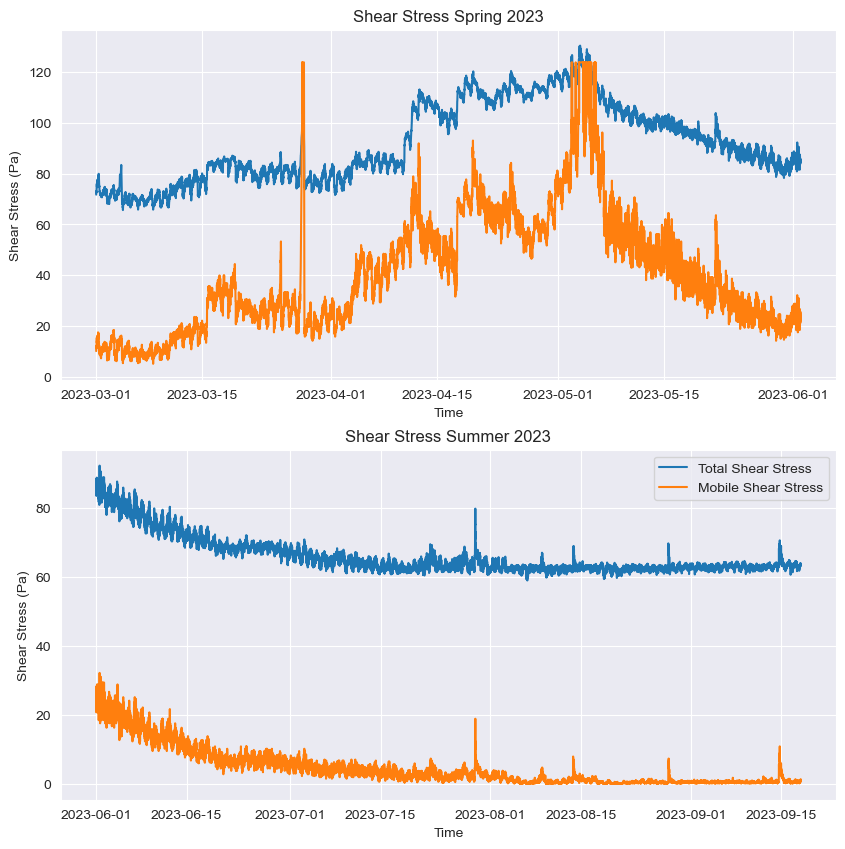

In [20]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=False)

# spring 2023
sns.set_style('darkgrid')
spring_total = shear_stress_2023['2023-03-01':'2023-06-01']
spring_mobile = mobile_shear_stress_2023['2023-03-01':'2023-06-01']
ax[0].plot(spring_total)
ax[0].plot(spring_mobile) 
ax[0].set_title('Shear Stress Spring 2023')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Shear Stress (Pa)')

# summer 2023
summer_total = shear_stress_2023['2023-06-01':'2023-09-18']
summer_mobile = mobile_shear_stress_2023['2023-06-01':'2023-09-18']
ax[1].plot(summer_total)
ax[1].plot(summer_mobile)
ax[1].set_title('Shear Stress Summer 2023')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Shear Stress (Pa)')

# add a legend
ax[1].legend(['Total Shear Stress', 'Mobile Shear Stress'])
plt.show()


Save as csv

In [30]:
# save as csv
mobile_shear_stress_2021.to_csv('mobile_shear_stress_2021.csv')
mobile_shear_stress_2022.to_csv('mobile_shear_stress_2022.csv')
mobile_shear_stress_2023.to_csv('mobile_shear_stress_2023.csv')